In [25]:
# @title
### EP2 MAC0417 / MAC5768 ##################################################
#  AO PREENCHER ESSE CABEÇALHO COM O MEU NOME E O MEU NÚMERO USP,              #
#  DECLARO QUE SOU O ÚNICO AUTOR E RESPONSÁVEL PELAS RESPOSTAS NESTA LISTA.    #
#  TODAS AS PARTES FORAM DESENVOLVIDAS E IMPLEMENTADAS POR MIM, SEGUINDO AS    #
#  INSTRUÇÕES E QUE PORTANTO, NÃO CONSTITUEM DESONESTIDADE ACADÊMICA OU PLÁGIO.#
#                                                                              #
#  DECLARO TAMBÉM QUE SOU RESPONSÁVEL POR TODAS AS CÓPIAS                      #
#  DESSE PROGRAMA E QUE EU NÃO DISTRIBUI OU FACILITEI A                        #
#  SUA DISTRIBUIÇÃO. ESTOU CIENTE QUE OS CASOS DE PLÁGIO E                     #
#  DESONESTIDADE ACADÊMICA SERÃO TRATADOS SEGUNDO OS CRITÉRIOS                 #
#  DEFINIDOS NO CÓDIGO DE ÉTICA DA USP.                                        #
#  ENTENDO QUE LISTAS SEM ASSINATURA NÃO SERÃO CORRIGIDAS E,                   #
#  AINDA ASSIM, PODERÃO SER PUNIDOS POR DESONESTIDADE ACADÊMICA.               #
#                                                                              #
#  Nome : Érico Tiago Meireles                                                 #
#  NUSP : 9312428                                                              #
#  Turma: MAC5768 Visão e Processamento de Imagens                             #
#  Prof.: Ronaldo Fumio Hashimoto                                              #
################################################################################

## EP2 - Normalização e Análises

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

import cv2

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', None)

#### Importa os metadados

In [27]:
metadata = pd.read_csv(rf"../metadados.csv", sep=';')

### Normaliza o histograma:

In [28]:

# Função para normalizar o histograma
def normalize_histogram(img):
    img_flat = img.flatten()
    hist, bins = np.histogram(img_flat, bins=256, range=[0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * (hist.max() / cdf.max())
    cdf = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    cdf = cdf.astype('uint8')
    img_normalized = cdf[img_flat]
    return img_normalized.reshape(img.shape)

In [29]:
# Caminho para o diretório das imagens em tons de cinza
original_gray_dir = "../data_EP2/originalGrayDataset/"

# Caminho para o diretório das imagens para normalized dataset
normalized_img_dir = "../data_EP2/normalizedDataset/"


augmented_dir = "../data_EP2/augmentedDataset/"

# Criando o diretório para as imagens redimensionadas se ele não existir
if not os.path.exists(normalized_img_dir):
    os.makedirs(normalized_img_dir)

In [30]:
# Lista de nomes de arquivos das imagens originais
img_names = os.listdir(original_gray_dir)

for img_name in img_names:
    img_path_original = os.path.join(original_gray_dir, img_name)
    img_path_normalized = os.path.join(normalized_img_dir, img_name)
    
    # Carregando a imagem original em tons de cinza
    if os.path.exists(img_path_original):
        img_gray = cv2.imread(img_path_original)
        
        # Normaliazando o histograma
        img_normalized = normalize_histogram(img_gray)
        
        # Salvando a imagem processada
        cv2.imwrite(img_path_normalized, img_normalized.astype(np.uint8))

print("Imagens processadas e salvas com sucesso!")

Imagens processadas e salvas com sucesso!


#### Criação da tabela sumária geral:

In [31]:
# Define uma nova coluna "classe" para agrupar todas as classes presentes em cada imagem

metadata['classe'] = metadata['classe_1']

for i in range(2, 6):
    metadata['classe'] += ', ' + metadata.apply(lambda row: row['classe_' + str(i)] if pd.notnull(row['classe_' + str(i)]) else '', axis=1)

# Remove ',' no final do string
metadata['classe'] = metadata['classe'].str.rstrip(', ')

In [32]:
# Separa as palavras por vírgula e cria uma lista única de palavras
palavras_unicas = set(palavra.strip() for palavra in ','.join(metadata['classe']).split(',') if palavra)
# Converte o conjunto de volta para uma lista
lista_palavras_unicas = list(palavras_unicas)

In [33]:

def get_folder_size(path):
    # Define o tamanho de uma pasta

    total_size = 0
    for dirpath, dirnames, filenames in os.walk(path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            total_size += os.path.getsize(fp)
    return total_size / (1024 * 1024)  # Converte bytes para megabytes

# retorna tamanho em MB das fotos reescaladas
tamanho_mb = get_folder_size("../data_EP2/")

In [34]:
def get_image_resolutions(path):

    # pega a resolução das imagens no diretório de interesse
    resolutions = []
    for filename in os.listdir(path):
        if filename.lower().endswith('.jpeg'):  # Exemplo para imagens PNG
            image_path = os.path.join(path, filename)
            image = plt.imread(image_path)
            resolutions.append(image.shape[:2])  # (linhas, colunas)
    return pd.DataFrame(resolutions, columns=['Linhas', 'Colunas'])

# Obtem a resolução média (linhas x Colunas)
resolucoes_df = get_image_resolutions("../data_resized/")
linhas = (sum(resolucoes_df['Linhas'])/len(resolucoes_df['Linhas']))
colunas = (sum(resolucoes_df['Colunas'])/len(resolucoes_df['Colunas']))

##### TABELA SUMÁRIA

In [35]:
def get_image_names(path):

    # pega a resolução das imagens no diretório de interesse
    names = []
    for filename in os.listdir(path):
        # if filename.lower().endswith('.jpeg'):  # Exemplo para imagens PNG
        image_path = os.path.join(path, filename)
        for path in image_path:
            file_path = os.path.join(path, filename)
            names.append(file_path)  # (linhas, colunas)
    return pd.DataFrame(names)

path_list = []
names = []
subdir = []
for path, subdirs, files in os.walk("../data_EP2/"):
    for name in files:
        path_list.append((os.path.join(path, name)))
        names.append(name)

In [36]:
df_images = pd.DataFrame({'path' : path_list,
                          'img' : names,
                          })

In [37]:
df_images['type'] = df_images['path'].str.split(rf'\\').str[-2]
df_images['type'] = df_images['type'].str.split(rf'/').str[-1]

In [38]:
metadata = df_images.merge(metadata, on='img', how='left')

In [39]:
print(
    f'''
#############################################
    
Tabela Global sumária:
    > Nome das classes: {lista_palavras_unicas}
    > Número das classes: {len(lista_palavras_unicas)}
    > Número de imagens: {len(metadata)}
    > Tamanho da base: {round(tamanho_mb, 2)} MB
    > Resolução das imagens: {round(linhas, 0)} linhas X {round(colunas, 0)} colunas
    
#############################################
'''
)


#############################################
    
Tabela Global sumária:
    > Nome das classes: ['capacete', 'caneca', 'garfo', 'colher', 'pilha', 'protetor solar', 'livro', 'faca', 'caneta', 'som']
    > Número das classes: 10
    > Número de imagens: 763
    > Tamanho da base: 76.49 MB
    > Resolução das imagens: 600.0 linhas X 800.0 colunas
    
#############################################



#### Criação da Tabela Detalhada por Classe 

In [40]:
metadata.head()

path       img         type  \
0  ../data_EP2/augmentedDataset\exponencial\001.JPEG  001.JPEG  exponencial   
1  ../data_EP2/augmentedDataset\exponencial\002.JPEG  002.JPEG  exponencial   
2  ../data_EP2/augmentedDataset\exponencial\003.JPEG  003.JPEG  exponencial   
3  ../data_EP2/augmentedDataset\exponencial\004.JPEG  004.JPEG  exponencial   
4  ../data_EP2/augmentedDataset\exponencial\005.JPEG  005.JPEG  exponencial   

  classe_1 classe_2  classe_3        classe_4 classe_5  fundo      iluminacao  \
0    garfo    pilha      faca          colher      NaN   sofa   interno-claro   
1      som    livro  capacete             NaN      NaN   sofa   interno-claro   
2    pilha   caneta     livro        capacete      NaN   chao   interno-claro   
3      som    livro  capacete             NaN      NaN   sofa  interno-escuro   
4     faca    garfo  capacete  protetor solar      NaN  preto   interno-claro   

                                  classe  
0             garfo, pilha, faca, colher  
1                   som, livro, capacete  
2         pilha, caneta, livro, capacete  
3                   som, livro, capacete  
4  faca, garfo, capacete, protetor solar

In [48]:
resumos = []

# Iterando pelas palavras únicas
for classe in lista_palavras_unicas:
    # Filtrando o dataframe para linhas que contêm a classe
    filtered_df = metadata[metadata['classe'].str.contains(classe, na=False)]

    # Contando a quantidade de cada objeto por foto
    # Inicializando listas para armazenar as contagens
    counts = []
    
    # Splitando a coluna "classe" para contar a quantidade de cada objeto por foto
    counts = filtered_df['classe'].str.split(', ')
    counts = counts.apply(lambda x: len(x))
    
    
    # Calculando a quantidade mínima e máxima de objetos por foto
    min_count = min(counts)
    max_count = max(counts)
    
    # Verificando as variações de fundo e iluminação
    fundos = filtered_df['fundo'].unique()
    iluminacoes = filtered_df['iluminacao'].unique()
    types = filtered_df['type'].unique()

    
    # Calculando o número total de fotos e repetições
    total_fotos = len(filtered_df)

    # Calculando as repetições para cada fundo e cada iluminação
    repeticoes_fundos = filtered_df.groupby('fundo')['classe'].apply(lambda x: x.str.count(classe).sum()).to_dict()
    repeticoes_iluminacoes = filtered_df.groupby('iluminacao')['classe'].apply(lambda x: x.str.count(classe).sum()).to_dict()
    repeticoes_datasets = filtered_df.groupby('type')['classe'].apply(lambda x: x.str.count(classe).sum()).to_dict()
    
    # Criando o resumo e adicionando à lista
    resumo = {
        'Objeto': classe,
        'Min_Objetos': min_count,
        'Max_Objetos': max_count,
        'Variações_Fundo': len(fundos),
        'Fundos': ', '.join(fundos),
        'Repetições_Fundos': repeticoes_fundos,
        'Variações_Iluminação': len(iluminacoes),
        'Iluminações': ', '.join(iluminacoes),
        'Repetições_Iluminações': repeticoes_iluminacoes,
        'Datasets': ', '.join(types),
        'Repetições_Datasets': ', '.join(repeticoes_datasets),
        'Total_Fotos': len(filtered_df)
    }
    resumos.append(resumo)
# Criando o dataframe de resumo
df_resumo = pd.DataFrame(resumos)

##### TABELA DETALHADA POR CLASSE

In [49]:
df_resumo

Objeto  Min_Objetos  Max_Objetos  Variações_Fundo  \
0        capacete            3            5                4   
1          caneca            3            5                4   
2           garfo            3            5                4   
3          colher            3            5                4   
4           pilha            3            5                4   
5  protetor solar            3            5                4   
6           livro            3            5                4   
7            faca            3            5                4   
8          caneta            3            5                4   
9             som            3            5                4   

                       Fundos  \
0  sofa, chao, preto, varanda   
1  sofa, chao, preto, varanda   
2  sofa, preto, varanda, chao   
3  sofa, chao, preto, varanda   
4  sofa, chao, varanda, preto   
5  preto, sofa, chao, varanda   
6  sofa, chao, preto, varanda   
7  sofa, preto, chao, varanda   
8  chao, sofa, varanda, preto   
9  sofa, chao, varanda, preto   

                                       Repetições_Fundos  \
0   {'chao': 39, 'preto': 65, 'sofa': 53, 'varanda': 38}   
1   {'chao': 65, 'preto': 65, 'sofa': 40, 'varanda': 59}   
2  {'chao': 58, 'preto': 104, 'sofa': 31, 'varanda': 41}   
3   {'chao': 81, 'preto': 79, 'sofa': 78, 'varanda': 44}   
4   {'chao': 67, 'preto': 74, 'sofa': 62, 'varanda': 57}   
5   {'chao': 72, 'preto': 53, 'sofa': 34, 'varanda': 59}   
6   {'chao': 46, 'preto': 93, 'sofa': 50, 'varanda': 43}   
7   {'chao': 72, 'preto': 69, 'sofa': 67, 'varanda': 52}   
8  {'chao': 81, 'preto': 125, 'sofa': 34, 'varanda': 62}   
9   {'chao': 65, 'preto': 70, 'sofa': 78, 'varanda': 46}   

   Variações_Iluminação  \
0                     4   
1                     4   
2                     4   
3                     4   
4                     4   
5                     4   
6                     4   
7                     4   
8                     4   
9                     4   

                                                    Iluminações  \
0  interno-claro, interno-escuro, externo-claro, externo-escuro   
1  interno-claro, interno-escuro, externo-claro, externo-escuro   
2  interno-claro, interno-escuro, externo-claro, externo-escuro   
3  interno-claro, interno-escuro, externo-claro, externo-escuro   
4  interno-claro, interno-escuro, externo-claro, externo-escuro   
5  interno-claro, interno-escuro, externo-claro, externo-escuro   
6  interno-claro, interno-escuro, externo-claro, externo-escuro   
7  interno-claro, interno-escuro, externo-claro, externo-escuro   
8  interno-claro, interno-escuro, externo-claro, externo-escuro   
9  interno-claro, interno-escuro, externo-claro, externo-escuro   

                                                                    Repetições_Iluminações  \
0   {'externo-claro': 27, 'externo-escuro': 76, 'interno-claro': 62, 'interno-escuro': 30}   
1   {'externo-claro': 45, 'externo-escuro': 78, 'interno-claro': 46, 'interno-escuro': 60}   
2   {'externo-claro': 26, 'externo-escuro': 58, 'interno-claro': 62, 'interno-escuro': 88}   
3   {'externo-claro': 50, 'externo-escuro': 91, 'interno-claro': 74, 'interno-escuro': 67}   
4   {'externo-claro': 38, 'externo-escuro': 69, 'interno-claro': 74, 'interno-escuro': 79}   
5   {'externo-claro': 27, 'externo-escuro': 45, 'interno-claro': 81, 'interno-escuro': 65}   
6   {'externo-claro': 41, 'externo-escuro': 69, 'interno-claro': 55, 'interno-escuro': 67}   
7  {'externo-claro': 42, 'externo-escuro': 100, 'interno-claro': 53, 'interno-escuro': 65}   
8   {'externo-claro': 80, 'externo-escuro': 90, 'interno-claro': 81, 'interno-escuro': 51}   
9  {'externo-claro': 25, 'externo-escuro': 114, 'interno-claro': 60, 'interno-escuro': 60}   

                                                                                        Datasets  \
0  exponencial, laplaciano, logaritmo, media, stretching, normalizedDataset, originalGrayDataset   
1  exponen

### Histograma por iluminação:

In [14]:


# Subdiretórios para diferentes processamentos
# Obter subdiretórios de forma dinâmica
processings = [d for d in os.listdir(augmented_dir) if os.path.isdir(os.path.join(augmented_dir, d))]


In [15]:
# Função para calcular o histograma de uma imagem
def calculate_histogram(img):
    hist, bins = np.histogram(img.flatten(), bins=256, range=[0, 256])
    return hist

# Função para calcular o histograma médio para um conjunto de imagens
def calculate_average_histogram(image_paths):
    histograms = []
    for img_path in image_paths:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        hist = calculate_histogram(img)
        histograms.append(hist)
    average_hist = np.mean(histograms, axis=0)
    return average_hist


# Função para plotar histogramas
def plot_avg_histograms(histograms, title):
    plt.figure(figsize=(10, 5))
    for label, hist in histograms.items():
        plt.plot(hist, label=label)
    plt.title(title)
    plt.xlabel('Intensidade de Pixels')
    plt.ylabel('Frequência')
    plt.legend()
    plt.show()


# Função para plotar histogramas
def plot_histograms(histograms, title):
    plt.figure(figsize=(10, 5))
    for label, hist in histograms.items():
        plt.hist(hist, label=label, bins=256, range=(0, 255))
        plt.title(title)
        plt.xlabel('Intensidade de Pixels')
        plt.ylabel('Frequência')
        plt.legend()
        plt.show()

In [16]:
def plt_img_hist(img_array, titulo):

  # Achatar a imagem em tons de cinza para 1D
  img_flat = img_array.flatten()

  # Plot do histogram de intensidade
  plt.hist(img_flat, bins=256, range=(0, 255), alpha=0.7)
  plt.title(titulo)
  plt.xlabel('Pixel Intensity')
  plt.ylabel('Frequency')
  plt.ylim(0, 30000)
  plt.show()

In [17]:
# Selecionando aleatoriamente um conjunto de imagens
np.random.seed(42)  # Definindo a semente aleatória para reprodução
sample_imgs = metadata['img'].sample(1, replace=True)  # Selecionando 3 imagens aleatórias do dataframe

# Carregando e plotando as imagens usando a função plot_sample
def chunks(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

def tile(imgs, n=6):
    return np.vstack([np.hstack(img_chunk) for img_chunk in chunks(imgs, n)])

def plot_sample(x, titulo):
    nrows = int(np.sqrt(len(x)) + 0.5)
    ncols = len(x) // nrows + (1 if len(x) % nrows != 0 else 0)
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(tile(x, ncols),cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.title(titulo)
    plt.show()

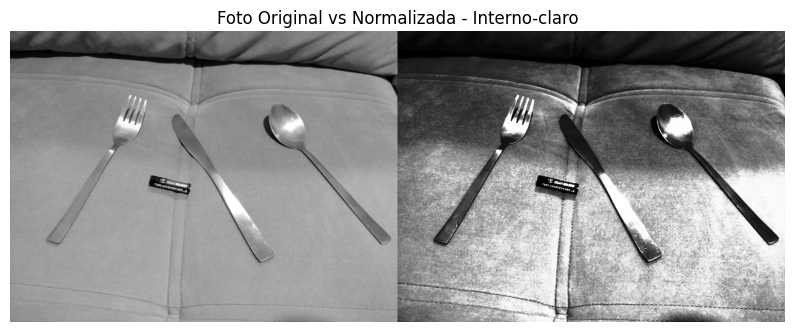

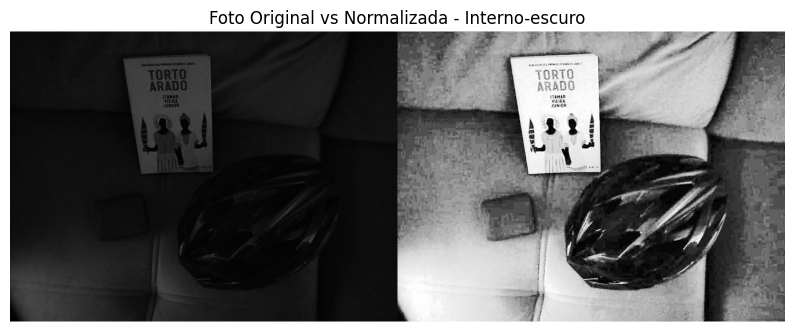

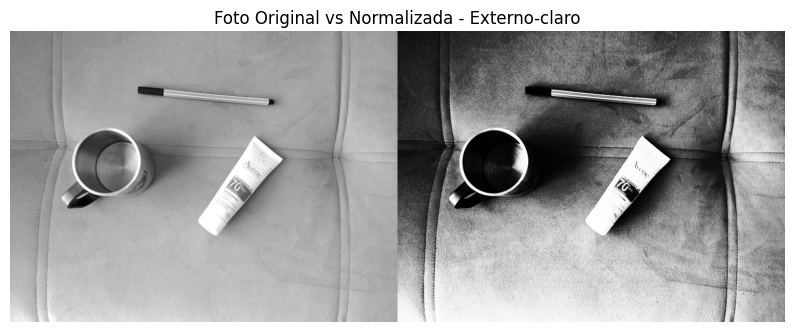

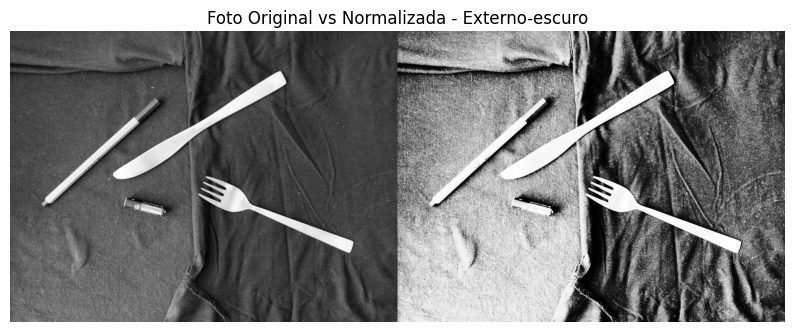

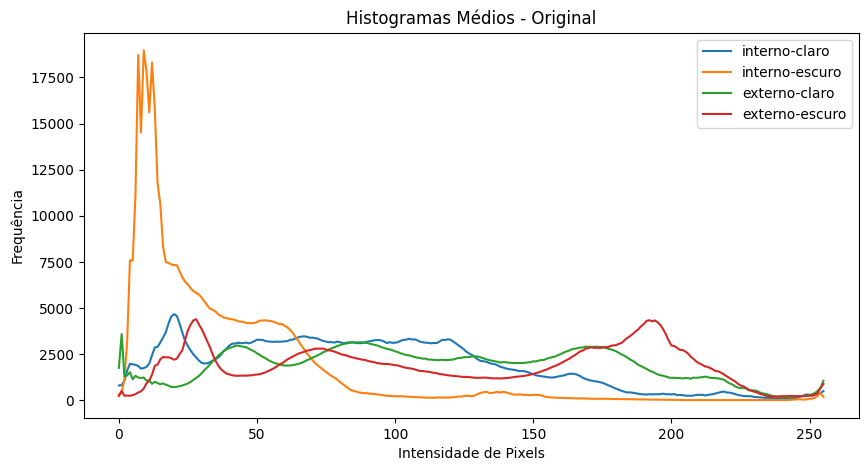

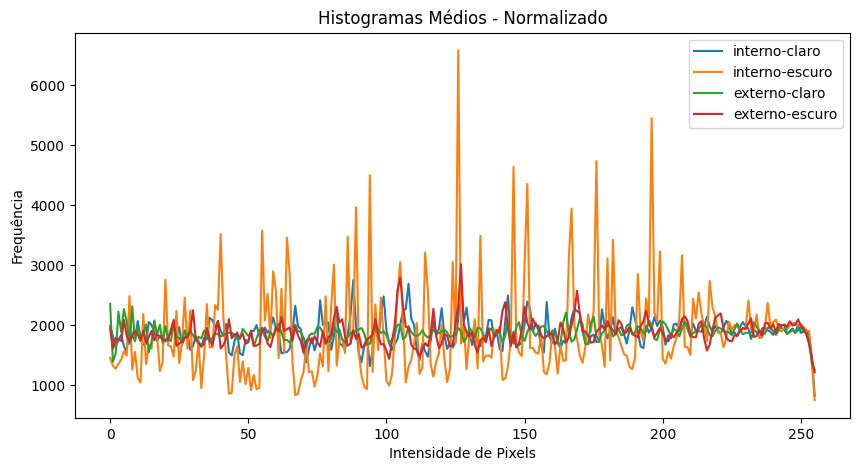

In [18]:
# Coletar os histogramas médios
histograms_original = {}
histograms_normalized = {}
for iluminacao in metadata['iluminacao'].unique():
    image_paths = metadata[metadata['iluminacao'] == iluminacao]['img'].apply(lambda x: os.path.join(original_gray_dir, x)).tolist()
    figuras = [cv2.imread(image_paths[0], cv2.IMREAD_GRAYSCALE)]
    image_norm_paths = metadata[metadata['iluminacao'] == iluminacao]['img'].apply(lambda x: os.path.join(normalized_img_dir, x)).tolist()
    figuras_norm = [cv2.imread(image_norm_paths[0], cv2.IMREAD_GRAYSCALE)]
    figuras = figuras + figuras_norm
    plot_sample(figuras,  f'Foto Original vs Normalizada - {iluminacao.capitalize()}')
    
    average_hist = calculate_average_histogram(image_paths)
    histograms_original[iluminacao] = average_hist

    average_hist_norm = calculate_average_histogram(image_norm_paths)
    histograms_normalized[iluminacao] = average_hist_norm

    
# Plotar histogramas médios separados por iluminação para o conjunto original
# for iluminacao, hist in histograms_original.items():
#     plt.figure(figsize=(10, 5))
#     plt.hist(hist, bins=256)
#     plt.title(f'Histograma Médio - Original ({iluminacao})')
#     plt.xlabel('Intensidade de Pixels')
#     plt.ylabel('Frequência')
#     plt.ylim(0,10)
#     plt.show()



# Plotar histogramas médios antes e depois da normalização
plot_avg_histograms(histograms_original, 'Histogramas Médios - Original')

plot_avg_histograms(histograms_normalized, 'Histogramas Médios - Normalizado')



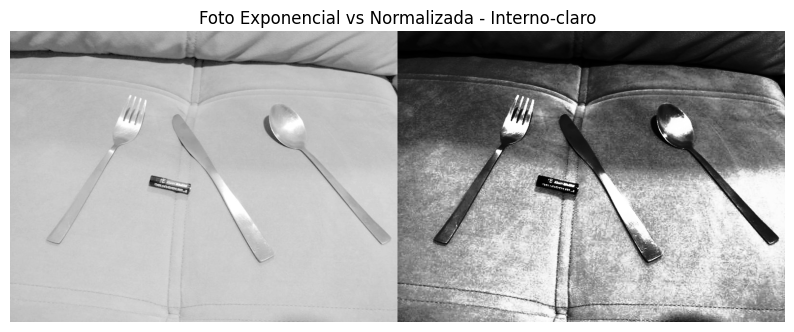

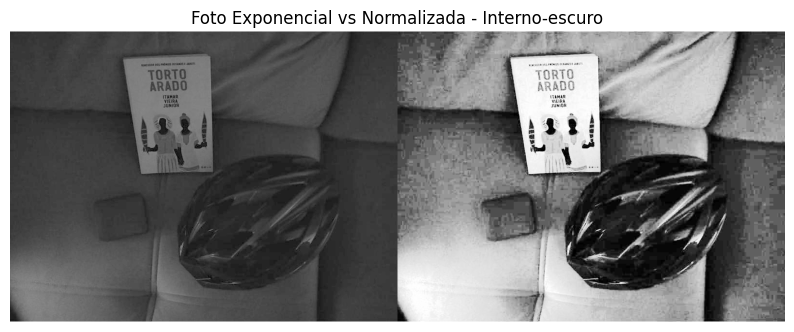

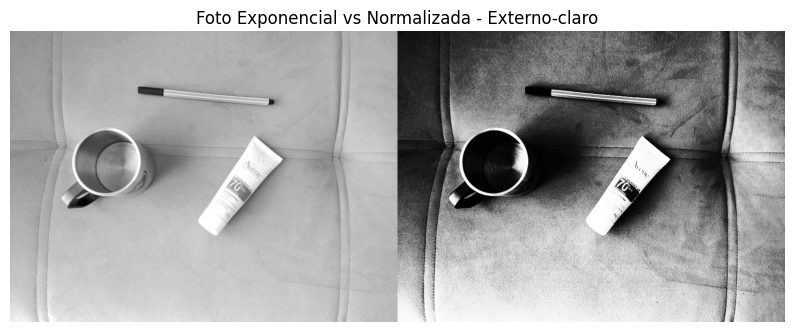

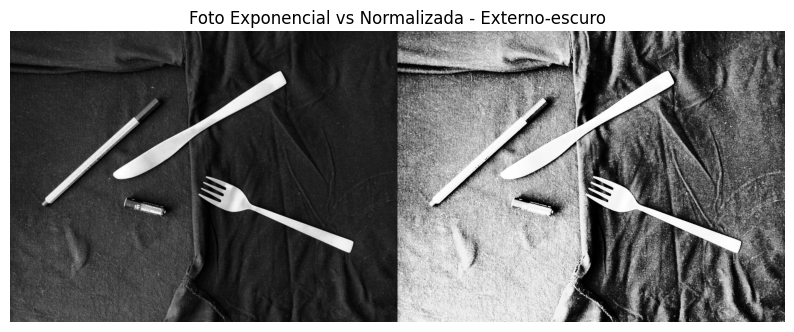

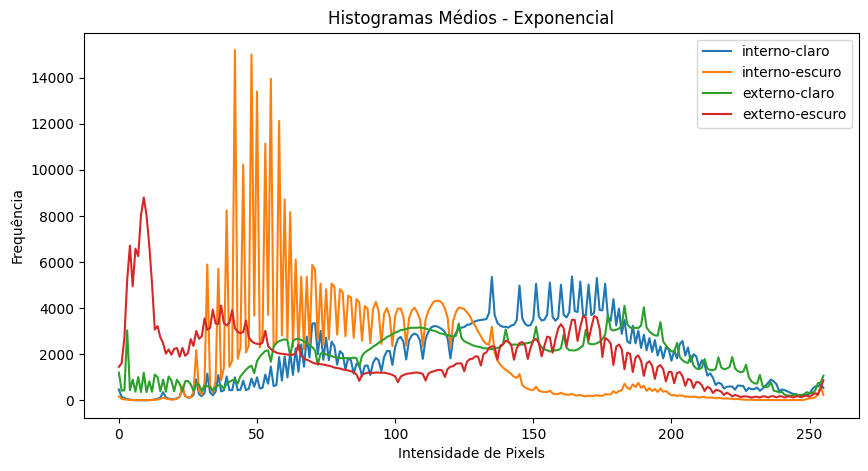

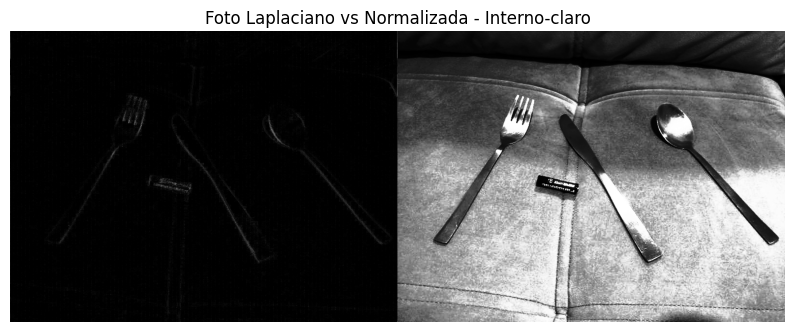

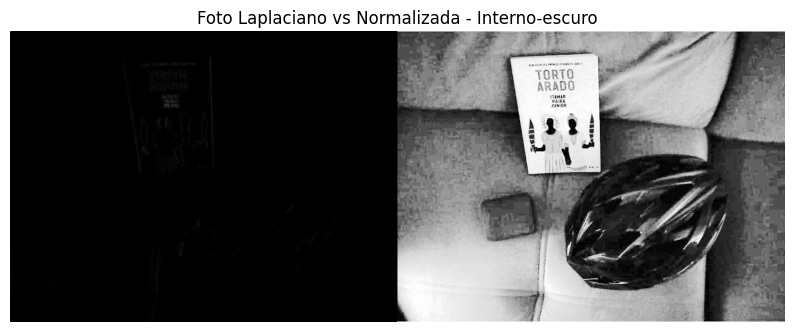

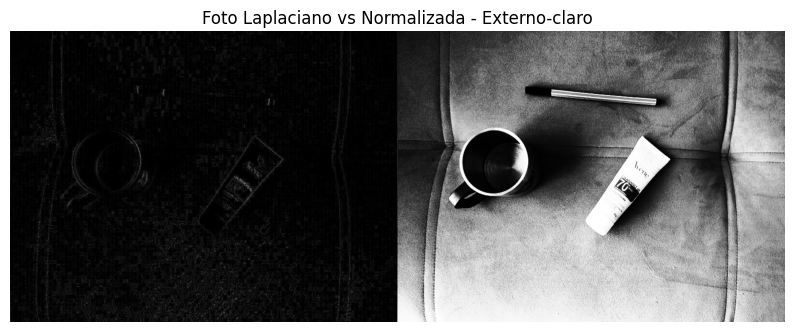

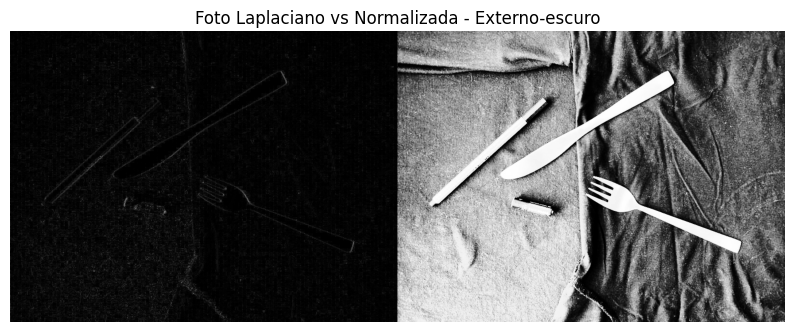

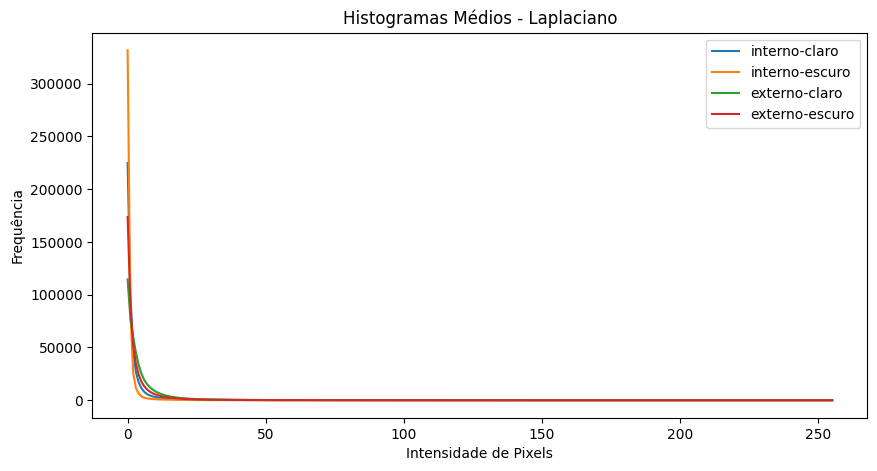

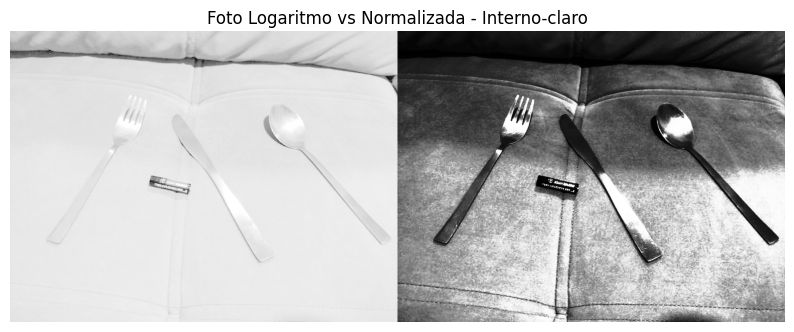

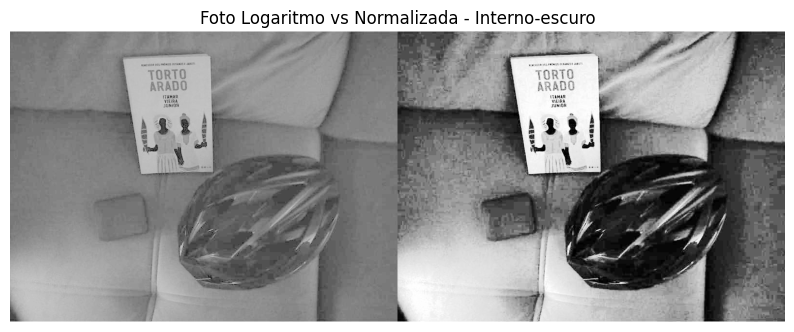

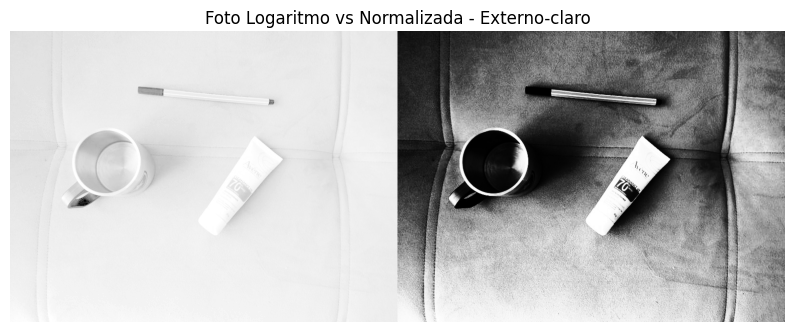

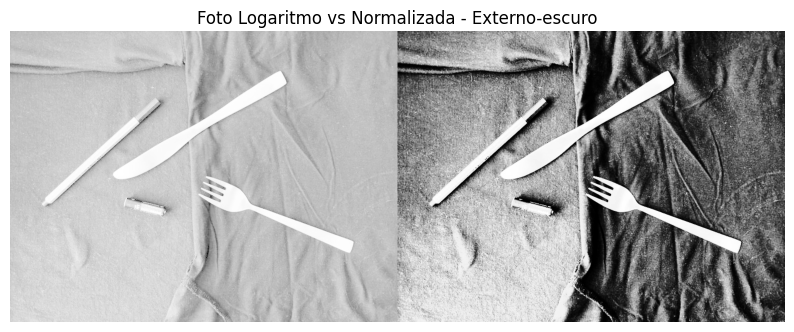

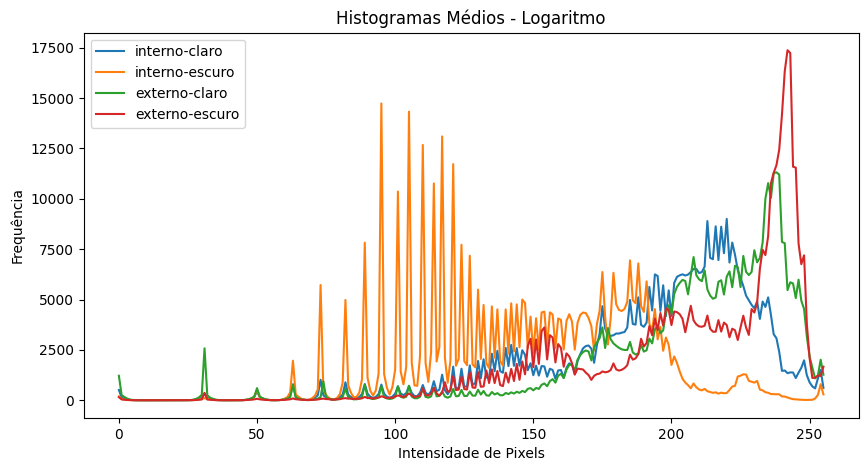

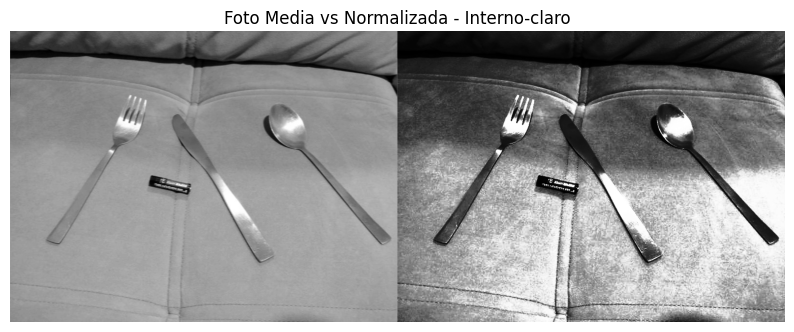

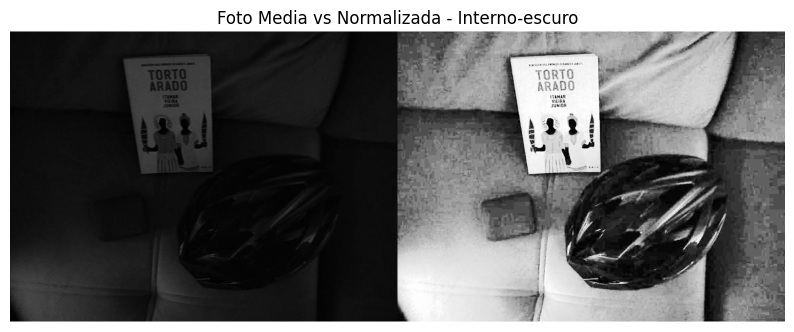

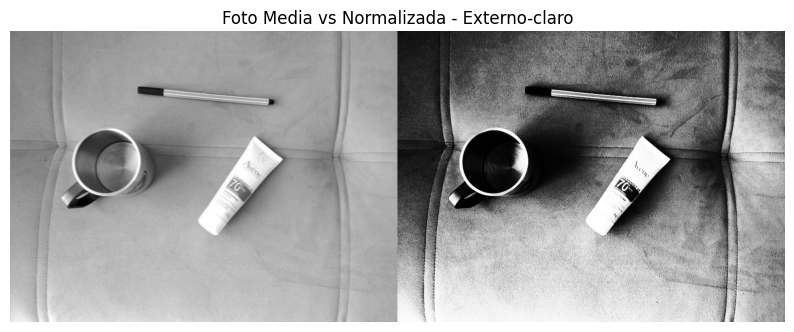

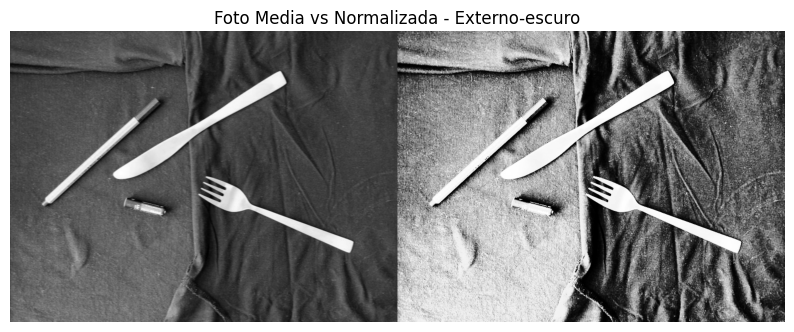

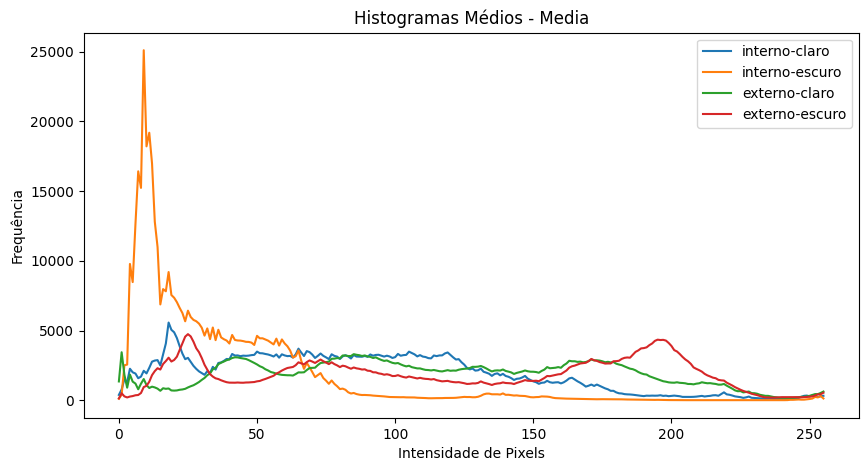

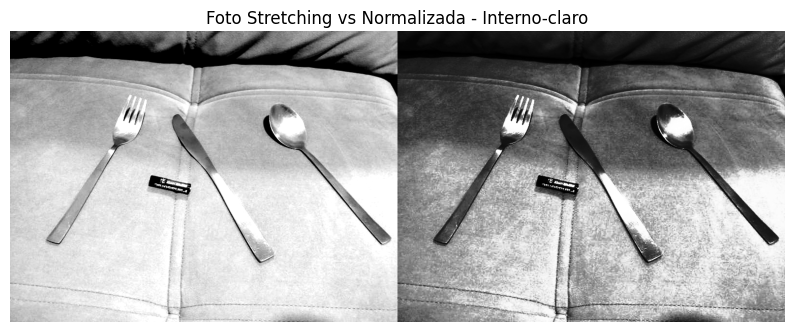

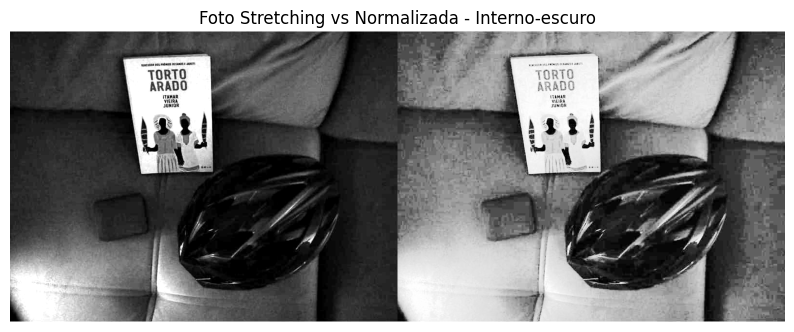

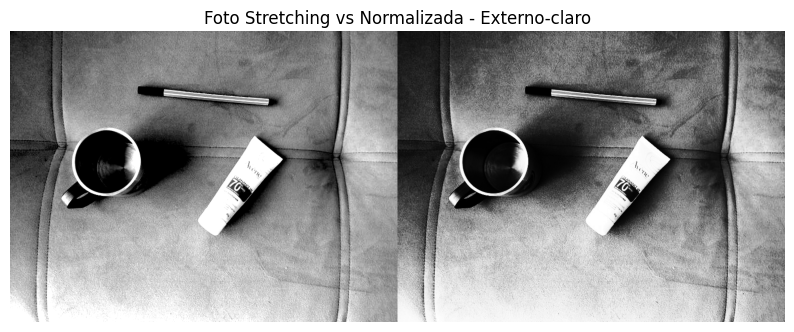

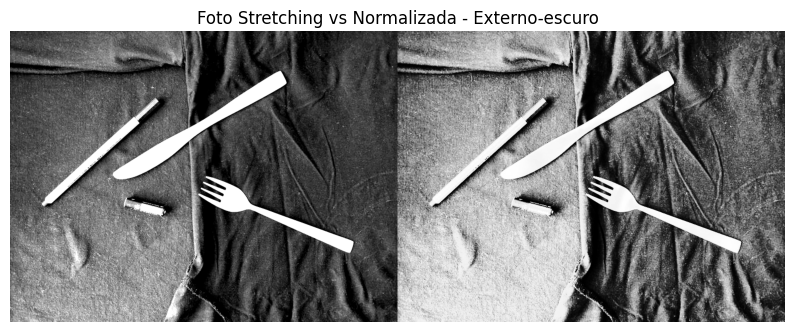

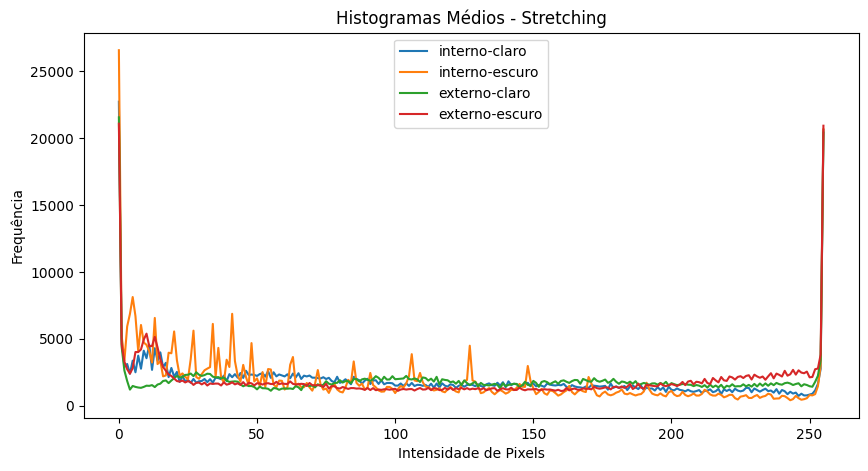

In [19]:

# Coletar e plotar histogramas para cada processamento
for processing in processings:
    histograms_original = {}
    histograms_normalized = {}
    for iluminacao in metadata['iluminacao'].unique():
        image_paths = metadata[metadata['iluminacao'] == iluminacao]['img'].apply(lambda x: os.path.join(augmented_dir, processing, x)).tolist()
        image_names = metadata[metadata['iluminacao'] == iluminacao]['img'].apply(lambda x: x).tolist()
        average_hist = calculate_average_histogram(image_paths)
        histograms_original[iluminacao] = average_hist
        image_norm_paths = metadata[metadata['iluminacao'] == iluminacao]['img'].apply(lambda x: os.path.join(normalized_img_dir, x)).tolist()
        figuras = [cv2.imread(image_paths[0], cv2.IMREAD_GRAYSCALE)]
        figuras_norm = [cv2.imread(os.path.join(normalized_img_dir, image_names[0]), cv2.IMREAD_GRAYSCALE)]
        figuras = figuras + figuras_norm
        plot_sample(figuras,  f'Foto {processing.capitalize()} vs Normalizada - {iluminacao.capitalize()}')
    
    plot_avg_histograms(histograms_original, f'Histogramas Médios - {processing.capitalize()}')